# 1. INTRODUCTION

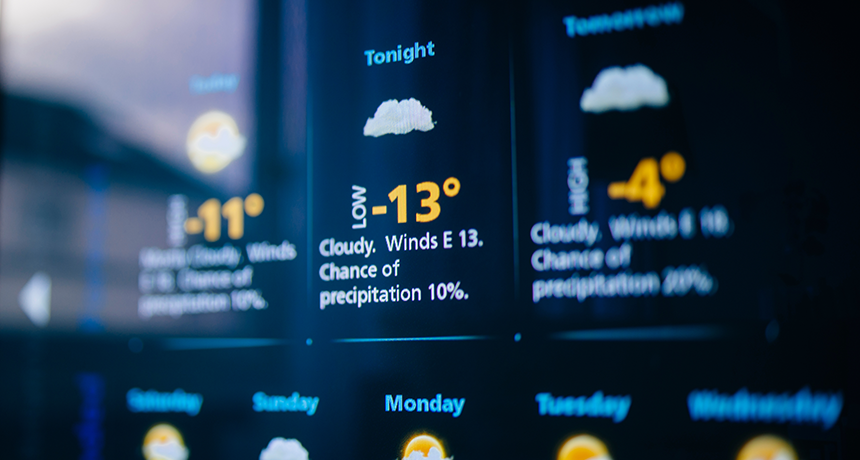

**Objective of this Notebook:**

***This notebook aims to:***

* Analyse Each and Every ***Attributes*** in the data set.
* Build  ***ML Models*** with the view of ***increasing accuracy*** of the Model. 

# 2.**IMPORTING THE REQUIRED LIBRARIES**

In [ ]:
!pip install pandas numpy seaborn scikit-learn scipy missingno matplotlib xgboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re
# import missingno as mso
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# 3.**ANALYSING THE DATASET**

There are **6 Variables** in this Dataset:
* **4 Continuous** Variables.
* **1 Variable** to accommodate the Date.
* **1 Variable** refers the Weather.

In [78]:
data=pd.read_csv("./Weather.csv")
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [5]:
data.shape

(1461, 6)

As of it has **6 Columns** with total of **1461 Rows** as our observations in the Data set. 

# 4.**DATA EXPLORATION**

It is the process of Exploring the data from the **"RAW"** data set tha we have taken or Imported.

First let us Deal with the Categorical variables 

<Axes: xlabel='weather', ylabel='count'>

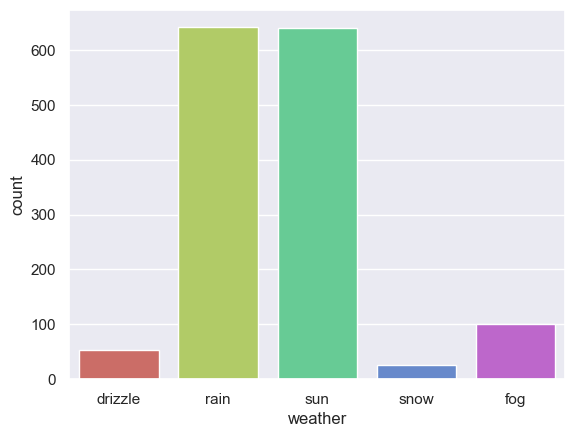

In [23]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot(x="weather",data=data,palette="hls")

In [9]:
countrain=len(data[data.weather=="rain"])
countsun=len(data[data.weather=="sun"])
countdrizzle=len(data[data.weather=="drizzle"])
countsnow=len(data[data.weather=="snow"])
countfog=len(data[data.weather=="fog"])
print("Percent of Rain:{:2f}%".format((countrain/(len(data.weather))*100)))
print("Percent of Sun:{:2f}%".format((countsun/(len(data.weather))*100)))
print("Percent of Drizzle:{:2f}%".format((countdrizzle/(len(data.weather))*100)))
print("Percent of Snow:{:2f}%".format((countsnow/(len(data.weather))*100)))
print("Percent of Fog:{:2f}%".format((countfog/(len(data.weather))*100)))

Percent of Rain:43.874059%
Percent of Sun:43.805613%
Percent of Drizzle:3.627652%
Percent of Snow:1.779603%
Percent of Fog:6.913073%


From the Above countplot the data set contains higher amount of data with the weather datail of ***Rain and Sun*** and it also have some additionals like ***drizzle,snow and fog*** .

# 5.**NUMERICAL OR CONTINUOUS VARIABLES**

  Next we will explore the ***Continuous variables***

In [10]:
data[["precipitation","temp_max","temp_min","wind"]].describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


Distribution of numerical value using ***Histogram and Violin plot .***

<Axes: xlabel='wind', ylabel='Count'>

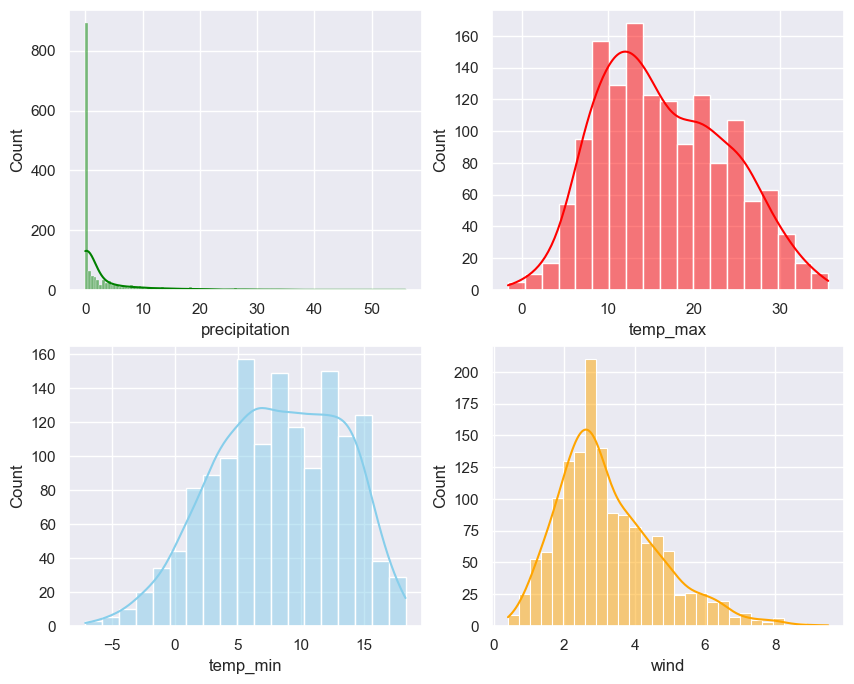

In [11]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=data,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=data,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=data,x="wind",kde=True,ax=axs[1,1],color='orange')

From the above distribution it is clear that **precipitation and wind** are **Positively skewed.**

And **temp_min** is **Negatively skewed** and both has some***outliers.***

# 6.**HOW TO FIND THE OUTILERS OR SKEW IN DATA SET?**



* ***We can find the outliers in the dataset by using following plots:***

  1.**Hist plot**
  
  2.**Box plot**
  
  3.**Violin plot**
  
  4.**Dist plot**
yet both ***box and violin plots*** are easier to handel with.

# 6.1.***VIOLIN PLOT***

<Axes: xlabel='wind'>

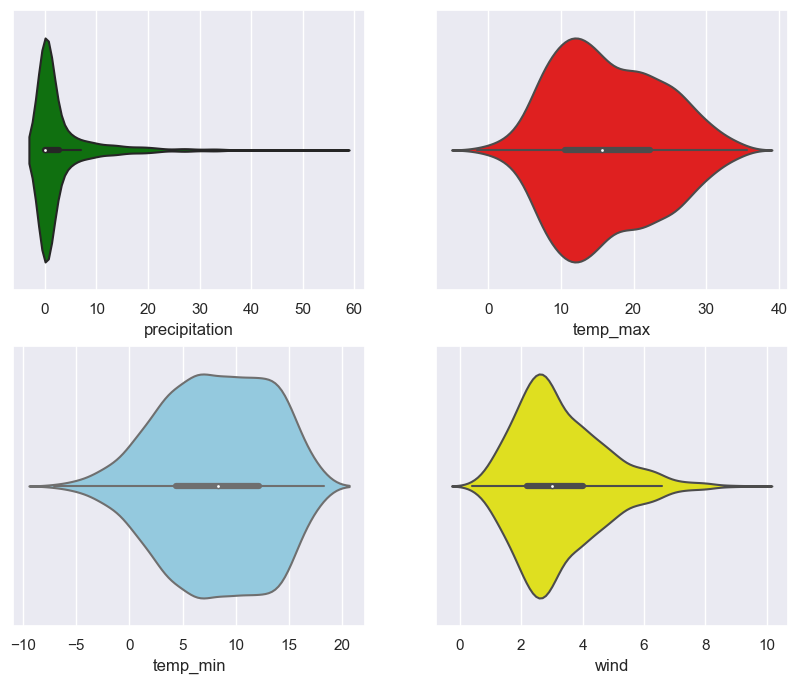

In [12]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.violinplot(data=data,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.violinplot(data=data,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.violinplot(data=data,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.violinplot(data=data,x="wind",kde=True,ax=axs[1,1],color='yellow')

From the above ***Violin plot*** we can clearly understand the Skewness of the Data as the **TAIL** indicates the skewness.

### 6.2.*BELOW DIAGRAM SHOWS THE EXACT OF HOW THE* **SKEWNESS LOOKS:**

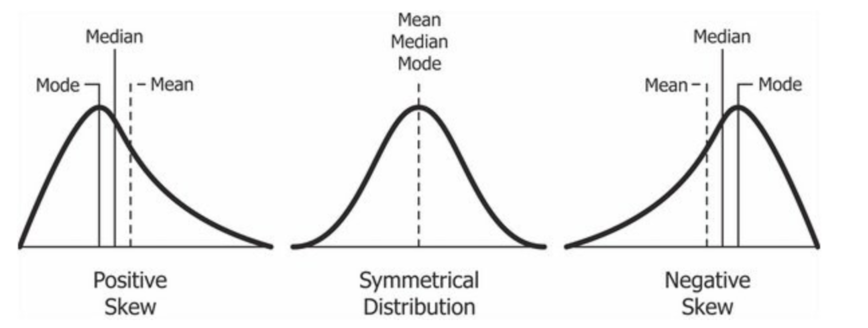

### 6.3.***SKEWNESS USING BOXPLOT***

**OTHER EXPLORATION**

<Axes: xlabel='precipitation', ylabel='weather'>

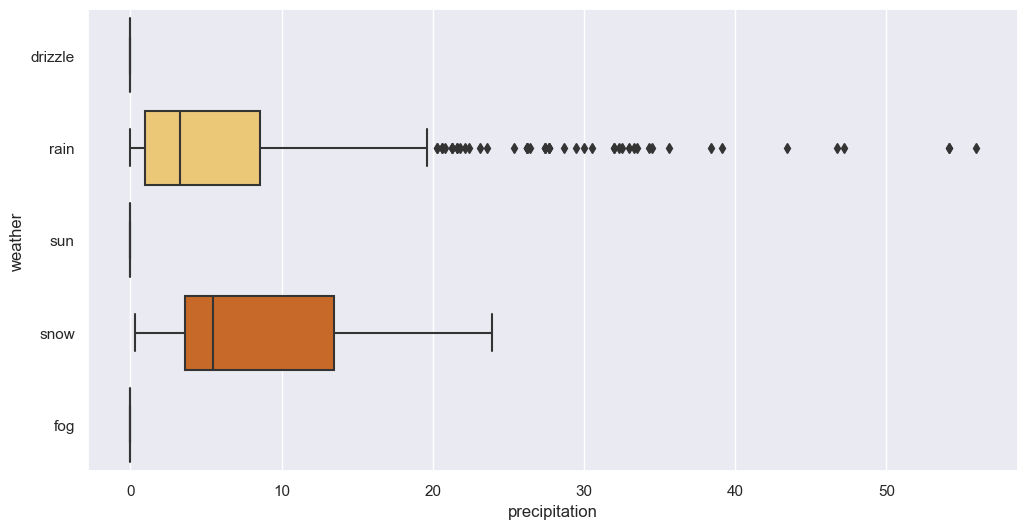

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(x="precipitation",y="weather",data=data,palette="YlOrBr")

From the above box plot between the ***Weather and Precipitation*** 
the value ***Rain*** has many **positive outliers** and both **Rain and Snow** were ***positively skewed/has positive skewness***.

<Axes: xlabel='temp_max', ylabel='weather'>

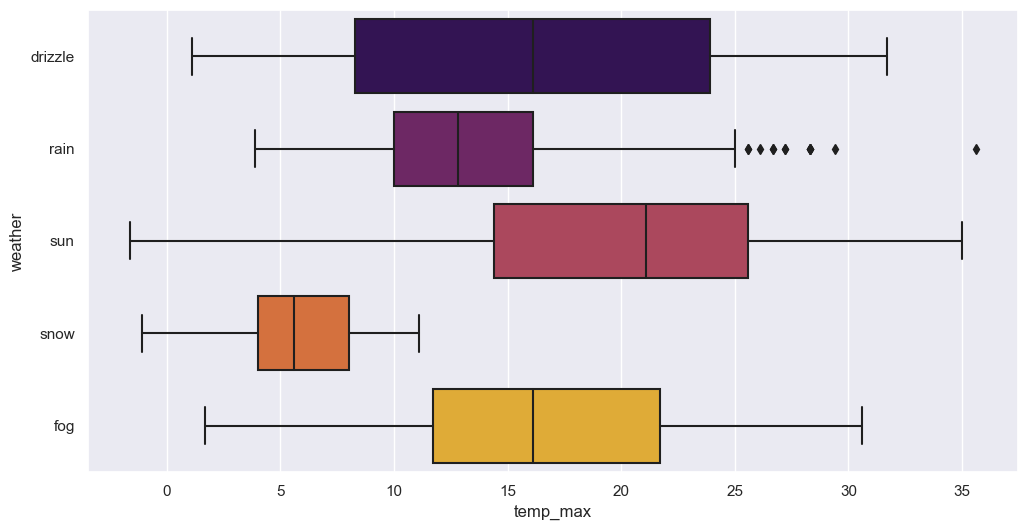

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(x="temp_max",y="weather",data=data,palette="inferno")

<Axes: xlabel='wind', ylabel='weather'>

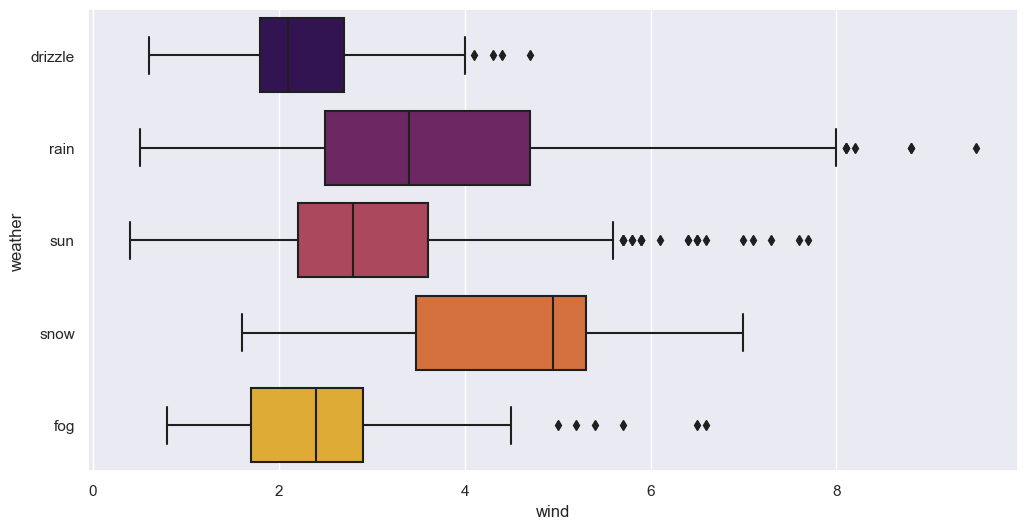

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(x="wind",y="weather",data=data,palette="inferno")

From the above box plots ,we came to know that Every ***attribute of weather*** has some ***positive outliers** and it is ***both types of skewness***.

<Axes: xlabel='temp_min', ylabel='weather'>

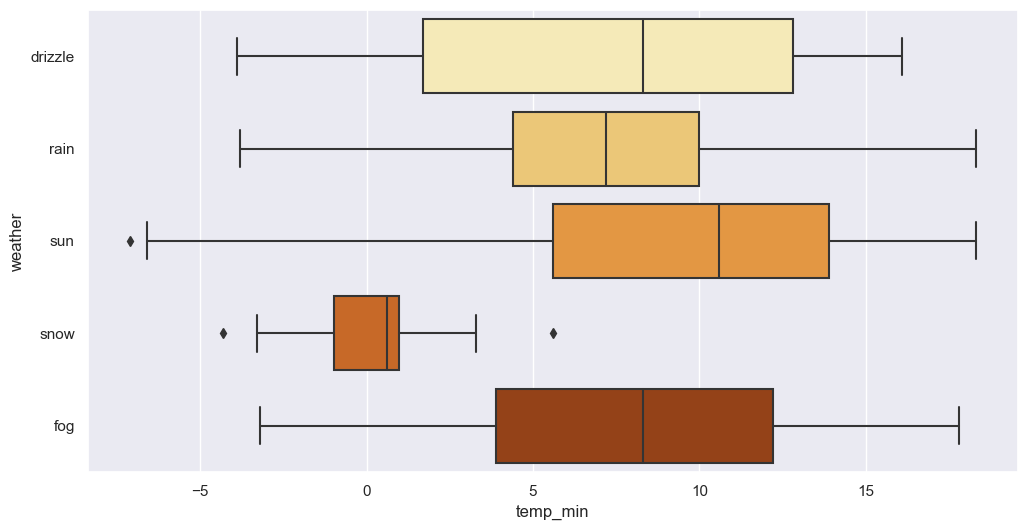

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(x="temp_min",y="weather",data=data,palette="YlOrBr")

here some data has ***negative*** and some have both ***positive and negative*** outliers and ***snow is negatively skewed.
***SKEWNESS AND ITS CORRECTIONS:***

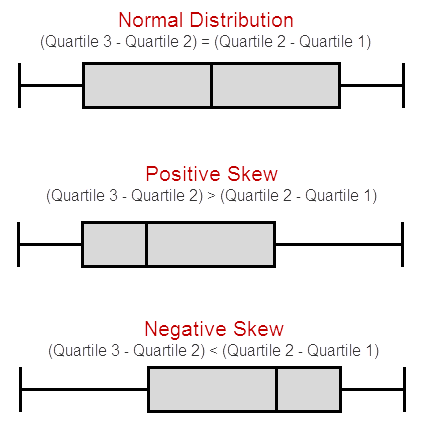

In [24]:
data.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

**HEATMAP:**

<Axes: >

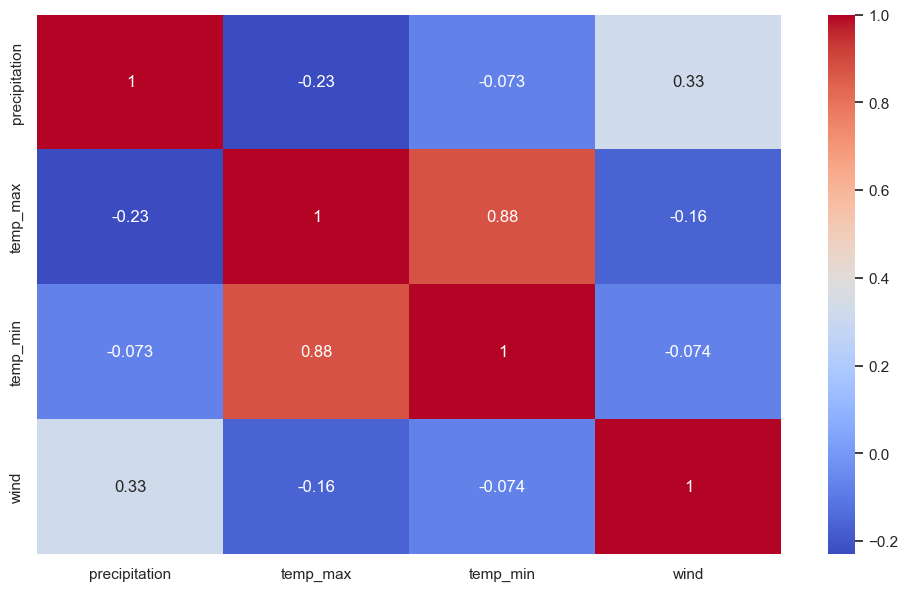

In [26]:
plt.figure(figsize=(12,7))
sns.heatmap(data[['precipitation', 'temp_max', 'temp_min', 'wind']].corr(),annot=True,cmap='coolwarm')

There is a ***positive correlation*** between ***temp_max and temp_min***.

**Numerical - Numerical**

Pearson correlation: -0.22855481643297043
T Test and P value: TtestResult(statistic=-51.60685279531918, pvalue=0.0, df=2920.0)


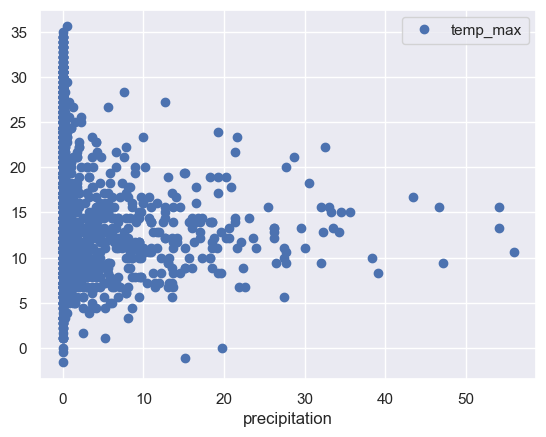

In [27]:
data.plot(x="precipitation",y="temp_max",style='o') 
print("Pearson correlation:",data["precipitation"].corr(data["temp_max"]))
print("T Test and P value:",stats.ttest_ind(data["precipitation"],data["temp_max"]))

Pearson correlation: -0.1648566348749548
T Test and P value: TtestResult(statistic=-67.3601643301846, pvalue=0.0, df=2920.0)


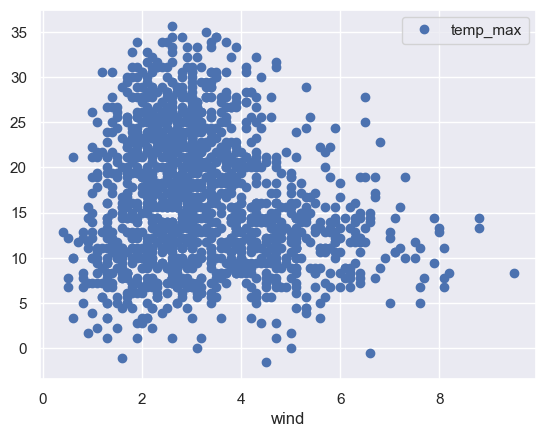

In [28]:
data.plot(x="wind",y="temp_max",style='o') 
print("Pearson correlation:",data["wind"].corr(data["temp_max"]))
print("T Test and P value:",stats.ttest_ind(data["wind"],data["temp_max"]))

As from the above result of ***T test and P value of 0*** indicates that the ***Null hypothesis*** in the corresponding columns is **rejected** and the columns are ***Statistically significant*** 

<Axes: xlabel='temp_max'>

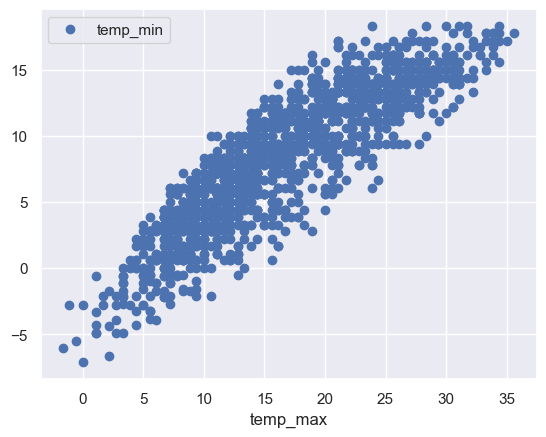

In [29]:
data.plot(x="temp_max",y="temp_min",style='o') 

# 7.NULL VALUES:

In [30]:
data.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

# 8.DATA PREPROCESSING:

**Drop Unnecessary Variables**

In this data set Date is a unnecessary variable as it does not affect the data so it can be dropped.

In [39]:
df=data.drop(["date"],axis=1)

**Remove Outliers & Infinite Values**

Since this dataset contains ***Outliers ,it will be removed***,to make data set more even.

In [40]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


In [41]:
df.columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [54]:
df['Index'] = df.index
df_sample = df[['Index','precipitation', 'temp_max', 'temp_min', 'wind']]
Q1=df_sample.quantile(0.25)
Q3=df_sample.quantile(0.75)
IQR=Q3-Q1
df_sample=df_sample[~((df_sample<(Q1-1.5*IQR))|(df_sample>(Q3+1.5*IQR))).any(axis=1)]

In [55]:
df_sample.shape,df.shape

((1380, 5), (1461, 6))

In [56]:
df_sample.head()

,Index,precipitation,temp_max,temp_min,wind
0,0,0.000000,12.8,5.0,2.167948
1,1,3.301515,10.6,2.8,2.121320
2,2,0.894427,11.7,7.2,1.516575
4,4,1.140175,8.9,2.8,2.469818
5,5,1.581139,4.4,2.2,1.483240


In [53]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,Index
0,0.000000,12.8,5.0,2.167948,drizzle,0
1,3.301515,10.6,2.8,2.121320,rain,1
2,0.894427,11.7,7.2,1.516575,rain,2
3,4.505552,12.2,5.6,2.167948,rain,3
4,1.140175,8.9,2.8,2.469818,rain,4


In [57]:
df = pd.merge(df,df_sample,how='inner',on='Index')
df.head()

,precipitation_x,temp_max_x,temp_min_x,wind_x,weather,Index,precipitation_y,temp_max_y,temp_min_y,wind_y
0,0.000000,12.8,5.0,2.167948,drizzle,0,0.000000,12.8,5.0,2.167948
1,3.301515,10.6,2.8,2.121320,rain,1,3.301515,10.6,2.8,2.121320
2,0.894427,11.7,7.2,1.516575,rain,2,0.894427,11.7,7.2,1.516575
3,1.140175,8.9,2.8,2.469818,rain,4,1.140175,8.9,2.8,2.469818
4,1.581139,4.4,2.2,1.483240,rain,5,1.581139,4.4,2.2,1.483240


In [58]:
df.columns

Index(['precipitation_x', 'temp_max_x', 'temp_min_x', 'wind_x', 'weather',
       'Index', 'precipitation_y', 'temp_max_y', 'temp_min_y', 'wind_y'],
      dtype='object')

In [59]:
df = df[['Index','precipitation_x', 'temp_max_x', 'temp_min_x', 'wind_x', 'weather']]
df.columns = ['Index','precipitation', 'temp_max', 'temp_min', 'wind', 'weather']
df.head()

,Index,precipitation,temp_max,temp_min,wind,weather
0,0,0.000000,12.8,5.0,2.167948,drizzle
1,1,3.301515,10.6,2.8,2.121320,rain
2,2,0.894427,11.7,7.2,1.516575,rain
3,4,1.140175,8.9,2.8,2.469818,rain
4,5,1.581139,4.4,2.2,1.483240,rain


***Skewed Distribution Treatment***

In [60]:
df.precipitation=np.sqrt(df.precipitation)
df.wind=np.sqrt(df.wind)

<Axes: xlabel='wind', ylabel='Count'>

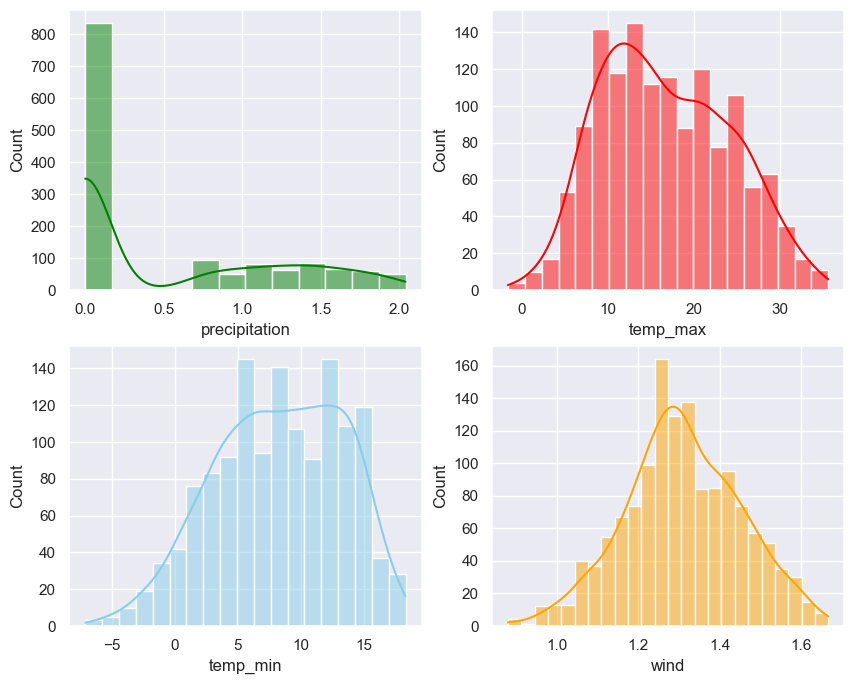

In [61]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=df,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=df,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=df,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=df,x="wind",kde=True,ax=axs[1,1],color='orange')

In [62]:
df.head()

,Index,precipitation,temp_max,temp_min,wind,weather
0,0,0.000000,12.8,5.0,1.472395,drizzle
1,1,1.817007,10.6,2.8,1.456475,rain
2,2,0.945742,11.7,7.2,1.231493,rain
3,4,1.067790,8.9,2.8,1.571565,rain
4,5,1.257433,4.4,2.2,1.217883,rain


***Scaling the weather variables using label Encoder:***

In [63]:
lc=LabelEncoder()
df["weather"]=lc.fit_transform(df["weather"])

In [64]:
df.head()

,Index,precipitation,temp_max,temp_min,wind,weather
0,0,0.000000,12.8,5.0,1.472395,0
1,1,1.817007,10.6,2.8,1.456475,2
2,2,0.945742,11.7,7.2,1.231493,2
3,4,1.067790,8.9,2.8,1.571565,2
4,5,1.257433,4.4,2.2,1.217883,2


***SPLITTING THE DATASET INTO DEPENDANT AND INDEPENDANT VARIABLES:***

In [65]:
x=((df.loc[:,df.columns!="weather"]).astype(int)).values[:,0:]
y=df["weather"].values

In [66]:
df.weather.unique()

array([0, 2, 4, 3, 1])

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

# 9.ALGORITHMS AND MODEL TRAINING:

**K-NEAREST NEIGHBOR CLASSIFIER:**

In [68]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print("KNN Accuracy:{:.2f}%".format(knn.score(x_test,y_test)*100))

KNN Accuracy:58.70%


**SUPPORT VECTOR MACHINE - CLASSIFIER:**

In [69]:
svm=SVC()
svm.fit(x_train,y_train)
print("SVM Accuracy:{:.2f}%".format(svm.score(x_test,y_test)*100))

SVM Accuracy:50.72%


**GRADIENT BOOSTING CLASSIFIER:**

In [70]:
gbc=GradientBoostingClassifier(subsample=0.5,n_estimators=450,max_depth=5,max_leaf_nodes=25)
gbc.fit(x_train,y_train)
print("Gradient Boosting Accuracy:{:.2f}%".format(gbc.score(x_test,y_test)*100))

Gradient Boosting Accuracy:71.74%


**Random Forest Classifier:**

In [77]:
import warnings
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
xgb=RandomForestClassifier()
xgb.fit(x_train,y_train)
print("RandomForest Accuracy:{:.2f}%".format(xgb.score(x_test,y_test)*100))

RandomForest Accuracy:76.81%
